### Immunity loss simulations

In [2]:
import numpy as np
import pandas as pd
from opqua.model import Model

Simulating time: 55.02606852067612, event: POPULATION_CONTACT_HOST_HOST
Simulating time: 96.89351337239913, event: CONTACT_HOST_HOST
Simulating time: 137.77230065897967, event: CONTACT_HOST_HOST
Simulating time: 179.93607879447617, event: CONTACT_HOST_HOST
Simulating time: 221.79812079501374, event: CONTACT_HOST_HOST
Simulating time: 263.1612523684548, event: RECOVER_HOST
Simulating time: 311.51586847900154, event: CONTACT_HOST_HOST
Simulating time: 356.43980517935665, event: CONTACT_HOST_HOST
Simulating time: 399.8124853317603, event: RECOVER_HOST
Simulating time: 442.59419445938136, event: CONTACT_HOST_HOST
Simulating time: 491.3824638675533, event: CONTACT_HOST_HOST
Simulating time: 542.706411226884, event: CONTACT_HOST_HOST
Simulating time: 599.2393690445203, event: CONTACT_HOST_HOST
Simulating time: 656.2024339817436, event: RECOVER_HOST
Simulating time: 731.2851390952333, event: CONTACT_HOST_HOST
Simulating time: 829.6754780560165, event: POPULATION_CONTACT_HOST_HOST
Simulating t

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    2.8s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    2.8s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    2.8s
[Parallel(n_jobs=4)]: Batch computation too fast (0.1906s.) Setting batch_size=2.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    2.9s
[Parallel(n_jobs=4)]: Batch computation too fast (0.1940s.) Setting batch_size=4.
[Parallel(n_jobs=4)]: Done  38 tasks      | elapsed:    3.1s
[Parallel(n_jobs=4)]: Batch computation too fast (0.1033s.) Setting batch_size=8.
[Parallel(n_jobs=4)]: Done  68 tasks      | elapsed:    3.3s
[Parallel(n_jobs=4)]: Batch computation too fast (0.0835s.) Setting batch_size=16.
[Parallel(n_jobs=4)]: Done 156 tasks      | elapsed:    3.7s
[Parallel(n_jobs=4)]: Batch computation too fast (0.1896s.) Setting batch_size=32.
[Parallel(n_jobs=4)]: Done 332 tasks      | elapsed:    4.2s
[Parallel(n_jobs=4)]: Bat

...file saved.
1 / 8 genotypes processed.
2 / 8 genotypes processed.
3 / 8 genotypes processed.
4 / 8 genotypes processed.
5 / 8 genotypes processed.
6 / 8 genotypes processed.
7 / 8 genotypes processed.
8 / 8 genotypes processed.
1 / 8 genotypes processed.
2 / 8 genotypes processed.
3 / 8 genotypes processed.
4 / 8 genotypes processed.
5 / 8 genotypes processed.
6 / 8 genotypes processed.
7 / 8 genotypes processed.
8 / 8 genotypes processed.


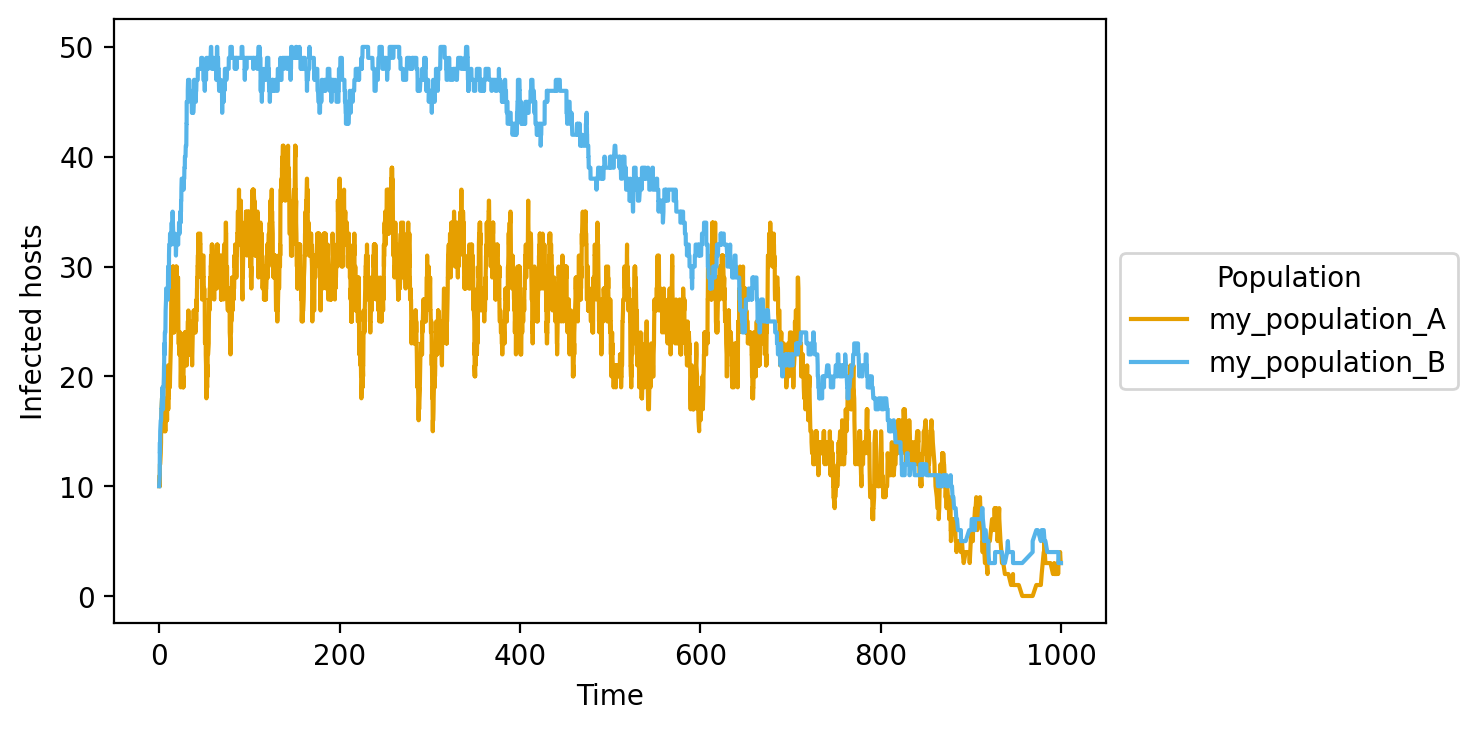

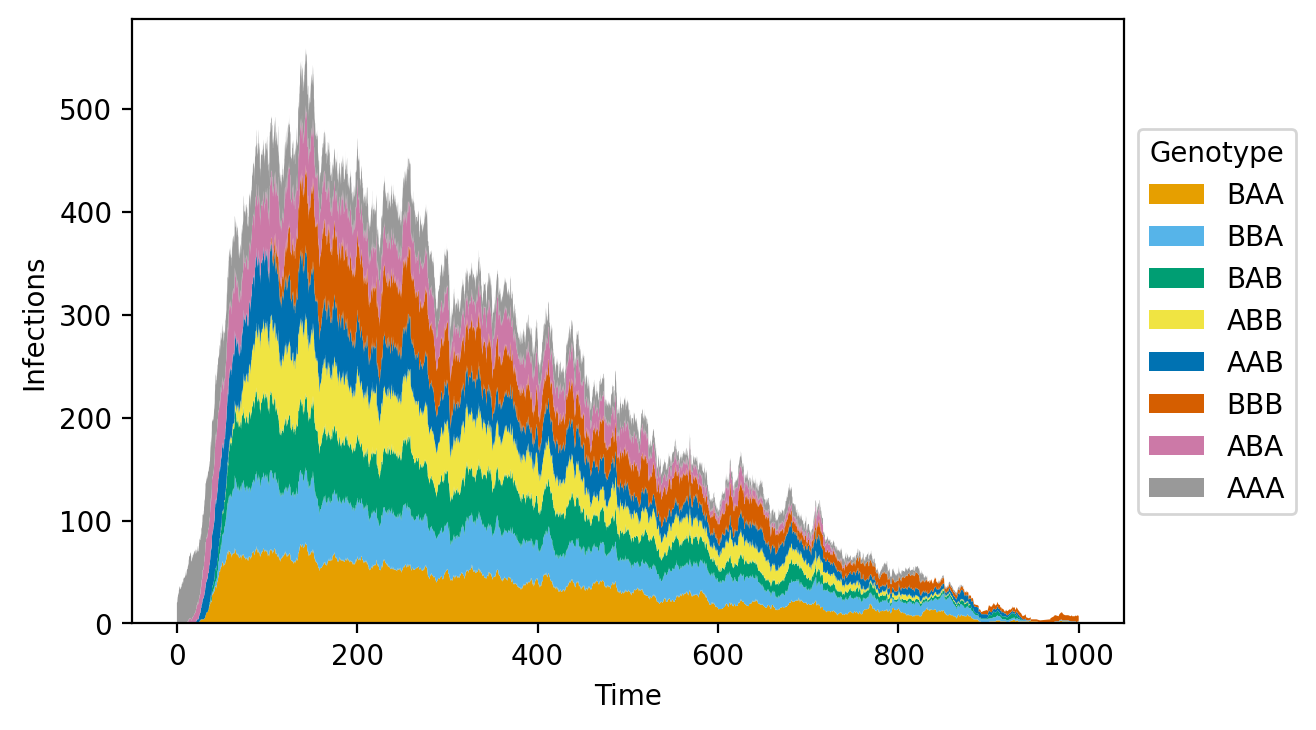

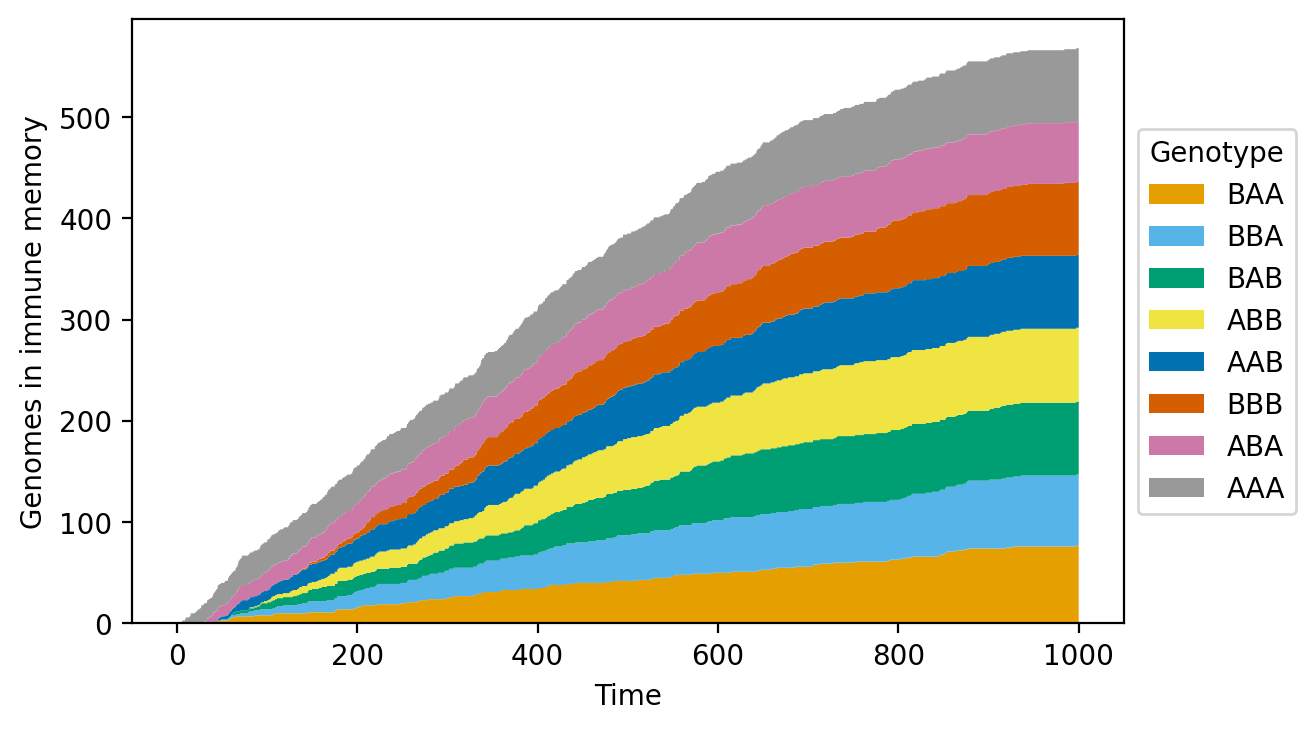

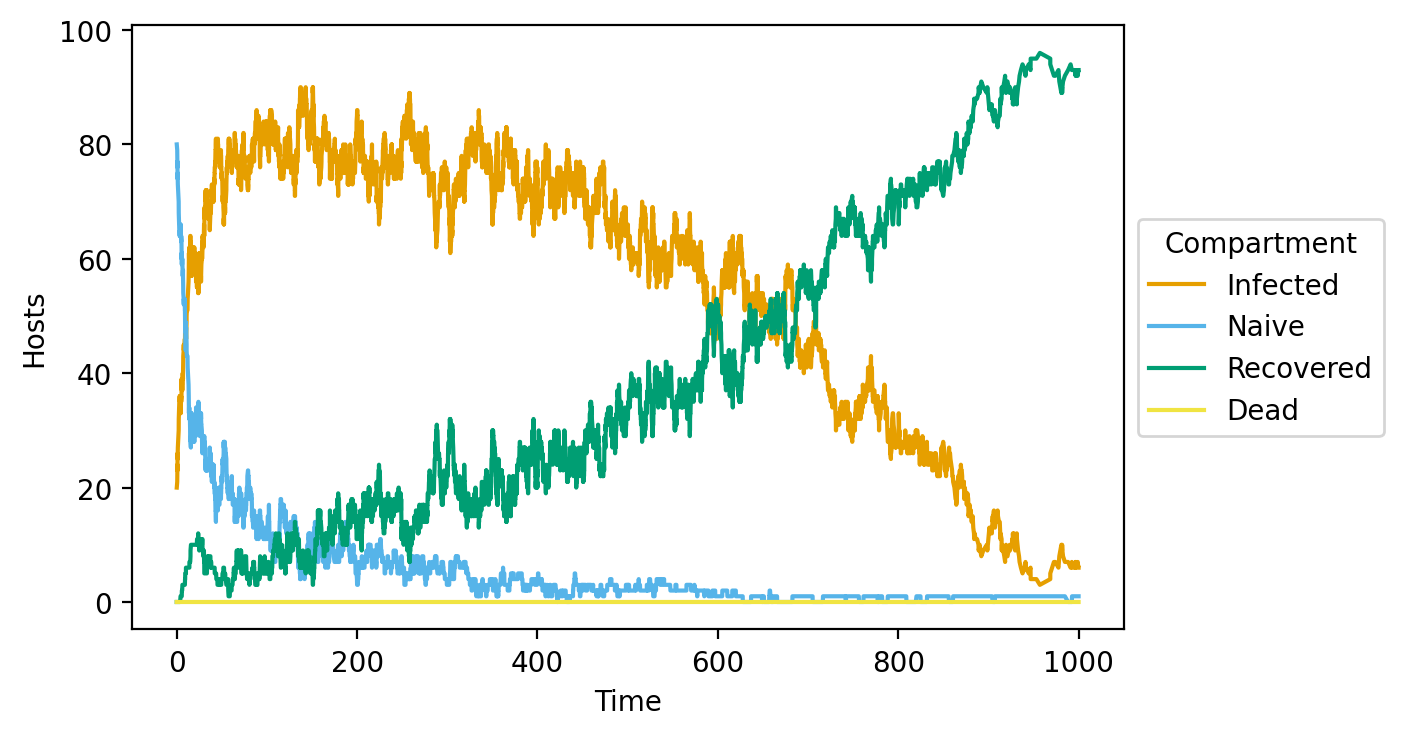

In [3]:
def myImmuneWeights(genome,immune_seq):
    return Model.perfectMatchImmunity(
        genome, immune_seq, weight=1
        )
        # Perfect matching: any mismatches between pathogen genome and immune
        # memory generate no immunity. Only perfect matches generate 100%
        # immunity.

model = Model()
model.newSetup( # Now, we'll define our new setup:
    'my_setup_A', preset='host-host', # Use default host-host parameters.
    possible_alleles='AB',
        # Define "letters" in the "genome", or possible alleles for each locus.
        # Each locus can have different possible alleles if you define this
        # argument as a list of strings, but here, we take the simplest
        # approach.
    num_loci=3,
        # Define length of "genome", or total number of alleles.
    mutate_in_host=1e-2,
        # Modify de novo mutation rate of pathogens when in host to get some
        # evolution!
    immunity_acquisition_rate_host=1e-2,
        # rate at which immunity is acquired within infected individuals
    immunity_loss_rate_host=1e-2,
        # rate at which immunity is lost within infected individuals
    immunityWeightsHost=myImmuneWeights,
        # immunity function that evaluates effect of immune memory on pathogen
        # genomes.
    contact_rate_host_host=2e-1,
    recovery_rate_host=1e-1,
    )

model.newSetup( # Now, we'll define our new setup:
    'my_setup_B', preset='host-host', # Use default host-host parameters.
    possible_alleles='AB',
        # Define "letters" in the "genome", or possible alleles for each locus.
        # Each locus can have different possible alleles if you define this
        # argument as a list of strings, but here, we take the simplest
        # approach.
    num_loci=3,
        # Define length of "genome", or total number of alleles.
    mutate_in_host=1e-2,
        # Modify de novo mutation rate of pathogens when in host to get some
        # evolution!
    immunity_acquisition_rate_host=1e-2,
        # rate at which immunity is acquired within infected individuals
    immunity_loss_rate_host=1e-2,
        # rate at which immunity is lost within infected individuals
    immunityWeightsHost=myImmuneWeights,
        # immunity function that evaluates effect of immune memory on pathogen
        # genomes.
    contact_rate_host_host=2e-1,
    recovery_rate_host=1e-2,
    )

model.newPopulation('my_population_A','my_setup_A', num_hosts=int(50))
model.newPopulation('my_population_B','my_setup_B', num_hosts=int(50))

model.addPathogensToHosts( 'my_population_A',{'AAA':10} )
    # We will start off the simulation with a suboptimal pathogen genome,
    # "AAA". Throughout the course of the simulation, we should see this genome
    # be outcompeted by other pathogen genotypes as the host population acquires
    # resistance to each genome.
model.addPathogensToHosts( 'my_population_B',{'AAA':10} )
    # We will start off the simulation with a suboptimal pathogen genome,
    # "AAA". Throughout the course of the simulation, we should see this genome
    # be outcompeted by other pathogen genotypes as the host population acquires
    # resistance to each genome.

model.linkPopulationsHostHostContact('my_population_A','my_population_B',2e-1)
model.linkPopulationsHostHostContact('my_population_B','my_population_A',2e-1)

model.run(0,1000,time_sampling=0)
data = model.saveToDataFrame(
    'tests/immunity_loss/immunity_loss_test.csv'
    )

graph_populations = model.populationsPlot( # Plot infected hosts per population over time.
    'tests/immunity_loss/populations_plot.png', 
    data,
    num_top_populations=2, # plot all 2 populations
    y_label='Infected hosts' # change y label
    )

graph_composition = model.compositionPlot(
        # Create a plot to track pathogen genotypes across time.
    'tests/immunity_loss/pathogen_composition.png',
    data,
    type_of_composition='Pathogens',
    num_top_sequences=8,
        # Track the 8 most represented genomes overall (only 8 possible).
    )

graph_composition = model.compositionPlot(
        # Create a plot of genotypes in the hosts' immune memories across time.
    'tests/immunity_loss/immunity_composition.png', 
    data,
    type_of_composition='Immunity', y_label='Genomes in immune memory',
    num_top_sequences=8,
        # Track the 8 most represented genomes overall (only 8 possible).
    )

graph_compartments = model.compartmentPlot(
    'tests/immunity_loss/reassortment_compartments.png', 
    data
    )
    # Also generate a normal compartment plot. Notice the total number of
    # infections in the composition plot can exceed the number of infected hosts
    # in the compartment plot. This happens because a single host infected by
    # multiple genotypes is counted twice in the former, but not the latter.

1 / 8 genotypes processed.
2 / 8 genotypes processed.
3 / 8 genotypes processed.
4 / 8 genotypes processed.
5 / 8 genotypes processed.
6 / 8 genotypes processed.
7 / 8 genotypes processed.
8 / 8 genotypes processed.
1 / 8 genotypes processed.
2 / 8 genotypes processed.
3 / 8 genotypes processed.
4 / 8 genotypes processed.
5 / 8 genotypes processed.
6 / 8 genotypes processed.
7 / 8 genotypes processed.
8 / 8 genotypes processed.


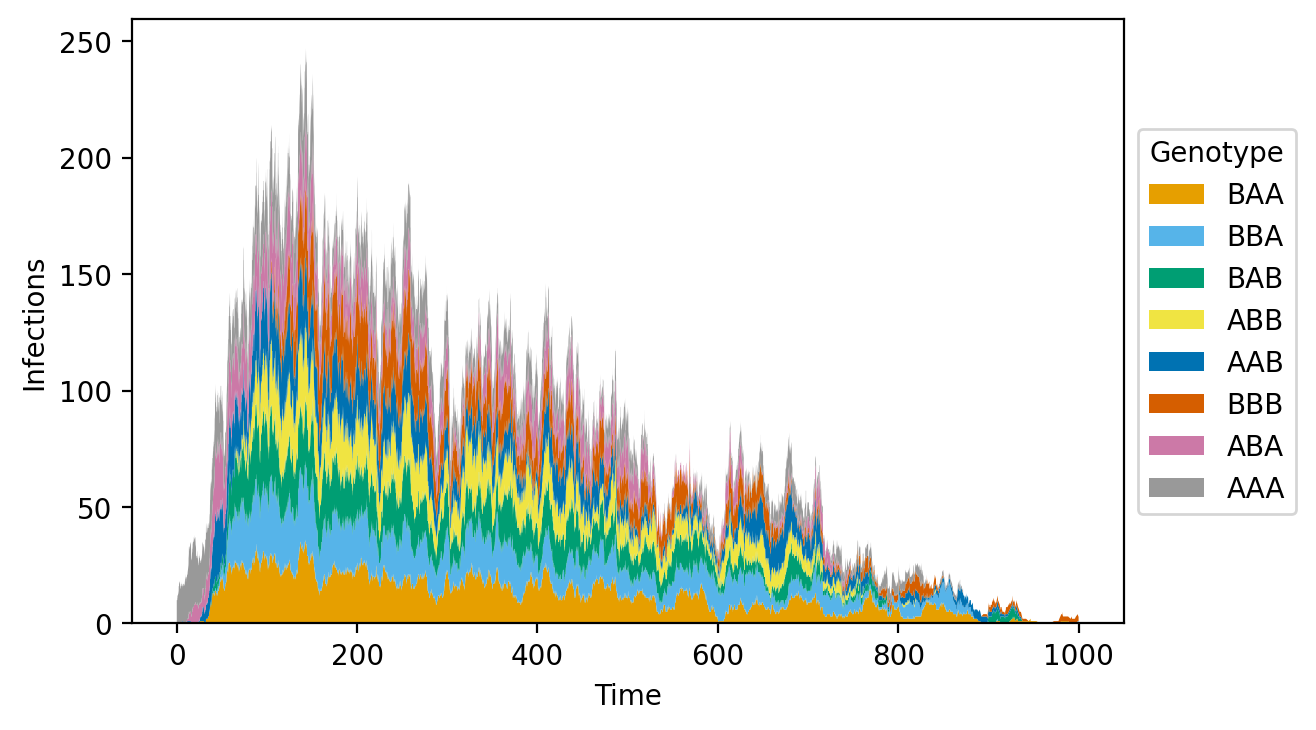

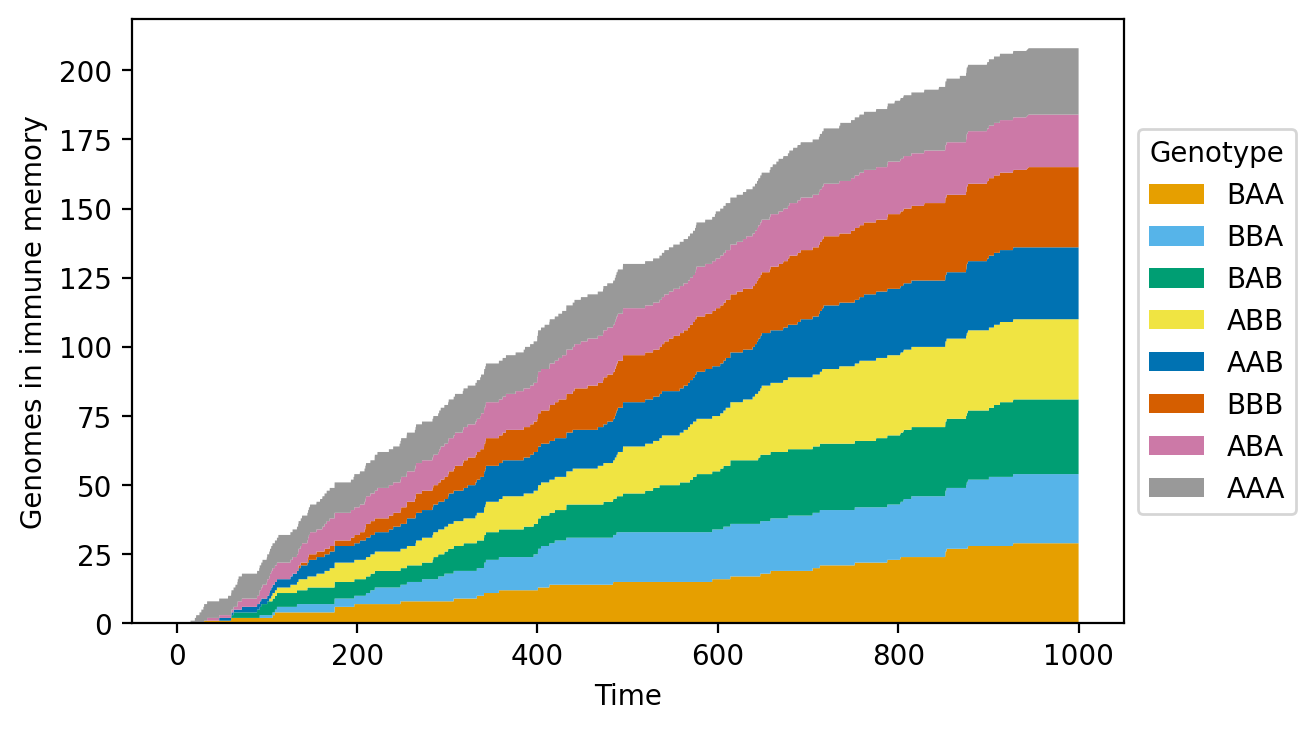

In [4]:
graph_composition_A = model.compositionPlot(
        # Create a plot to track pathogen genotypes across time.
    'tests/immunity_loss/pathogen_composition_fitness_valley_POPULATION_A.png',
    data,
    populations=['my_population_A'],
    type_of_composition='Pathogens',
    num_top_sequences=8,
        # Track the 8 most represented genomes overall (only 8 possible).
    )

graph_composition_A = model.compositionPlot(
        # Create a plot of genotypes in the hosts' immune memories across time.
    'tests/immunity_loss/immunity_composition_fitness_valley_POPULATION_A.png', 
    data,
    populations=['my_population_A'],
    type_of_composition='Immunity', y_label='Genomes in immune memory',
    num_top_sequences=8,
        # Track the 8 most represented genomes overall (only 8 possible).
    )

1 / 8 genotypes processed.
2 / 8 genotypes processed.
3 / 8 genotypes processed.
4 / 8 genotypes processed.
5 / 8 genotypes processed.
6 / 8 genotypes processed.
7 / 8 genotypes processed.
8 / 8 genotypes processed.
1 / 8 genotypes processed.
2 / 8 genotypes processed.
3 / 8 genotypes processed.
4 / 8 genotypes processed.
5 / 8 genotypes processed.
6 / 8 genotypes processed.
7 / 8 genotypes processed.
8 / 8 genotypes processed.


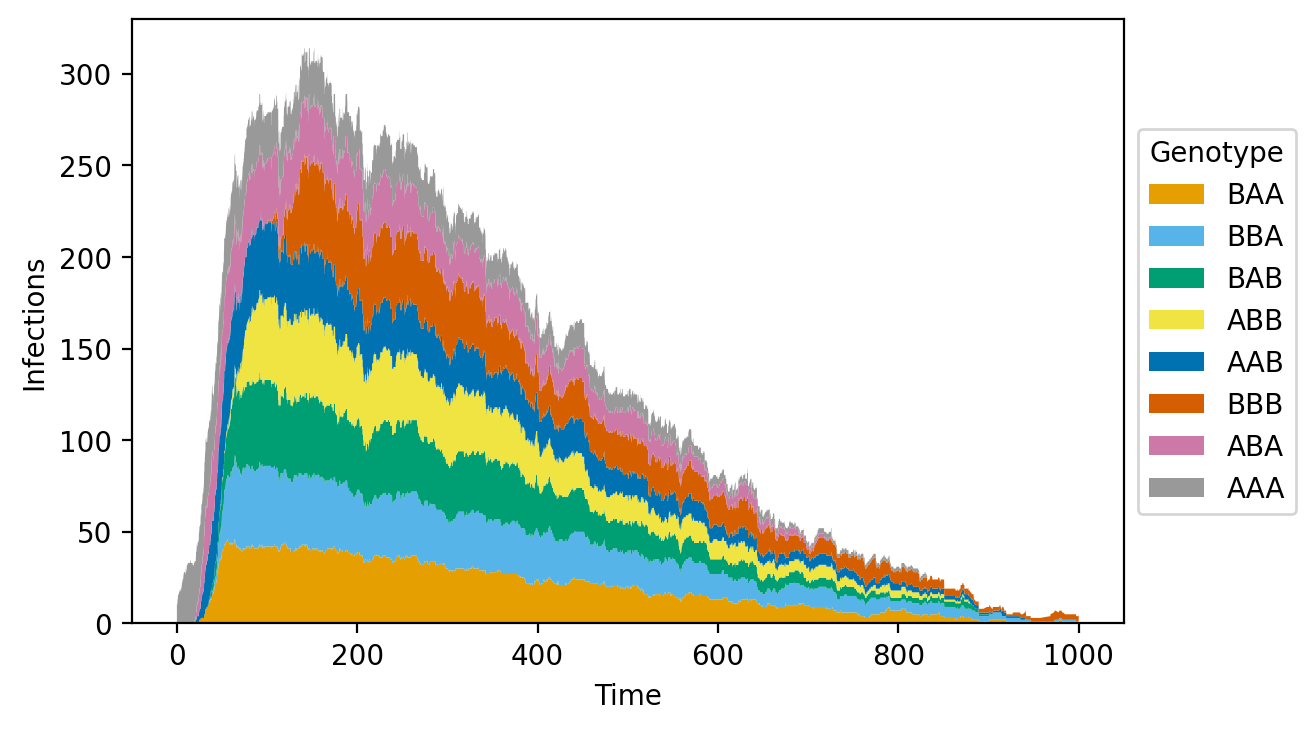

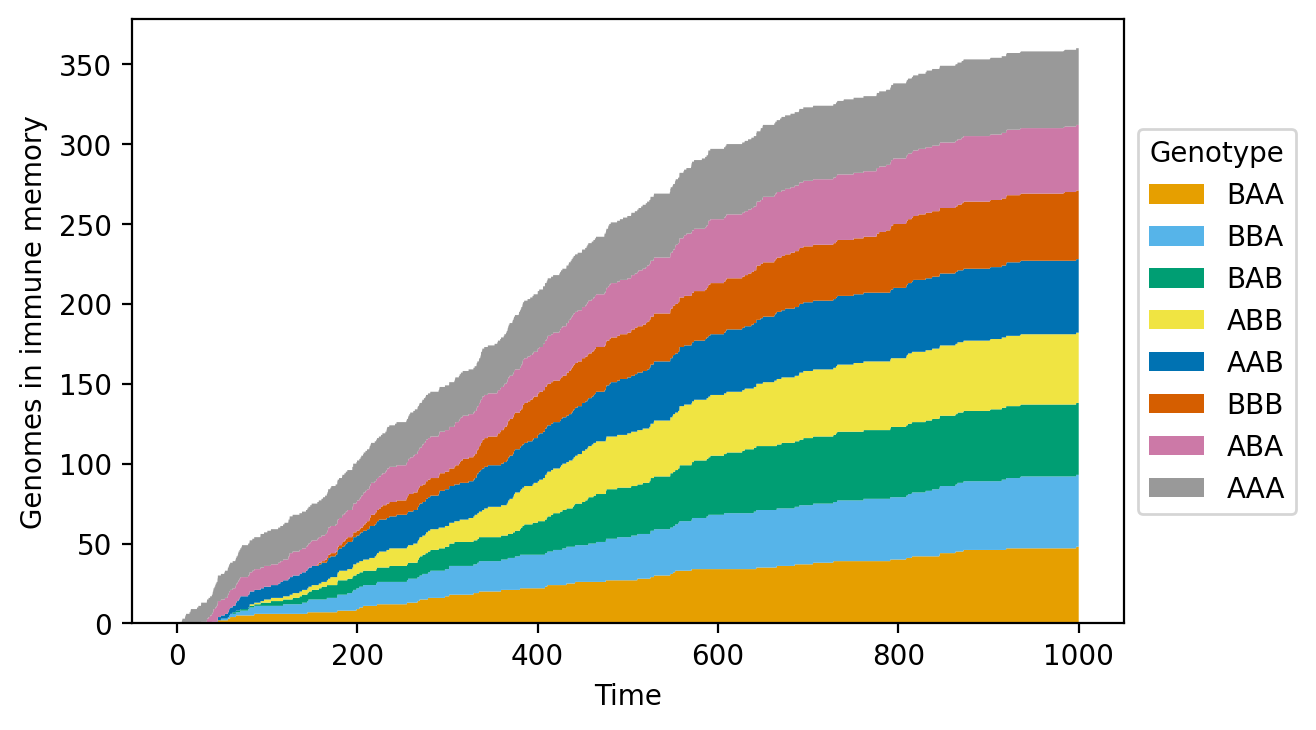

In [6]:
graph_composition_B = model.compositionPlot(
        # Create a plot to track pathogen genotypes across time.
    'tests/immunity_loss/pathogen_composition_fitness_valley_POPULATION_B.png',
    data,
    populations=['my_population_B'],
    type_of_composition='Pathogens',
    num_top_sequences=8,
        # Track the 8 most represented genomes overall (only 8 possible).
    )

graph_composition_B = model.compositionPlot(
        # Create a plot of genotypes in the hosts' immune memories across time.
    'tests/immunity_loss/immunity_composition_fitness_valley_POPULATION_B.png', 
    data,
    populations=['my_population_B'],
    type_of_composition='Immunity', y_label='Genomes in immune memory',
    num_top_sequences=8,
        # Track the 8 most represented genomes overall (only 8 possible).
    )

Collapsing infections to individuals...
0 / 1932 combinations
1 / 1932 combinations
2 / 1932 combinations
3 / 1932 combinations
4 / 1932 combinations
5 / 1932 combinations
6 / 1932 combinations
7 / 1932 combinations
8 / 1932 combinations
9 / 1932 combinations
10 / 1932 combinations
11 / 1932 combinations
12 / 1932 combinations
13 / 1932 combinations
14 / 1932 combinations
15 / 1932 combinations
16 / 1932 combinations
17 / 1932 combinations
18 / 1932 combinations
19 / 1932 combinations
20 / 1932 combinations
21 / 1932 combinations
22 / 1932 combinations
23 / 1932 combinations
24 / 1932 combinations
25 / 1932 combinations
26 / 1932 combinations
27 / 1932 combinations
28 / 1932 combinations
29 / 1932 combinations
30 / 1932 combinations
31 / 1932 combinations
32 / 1932 combinations
33 / 1932 combinations
34 / 1932 combinations
35 / 1932 combinations
36 / 1932 combinations
37 / 1932 combinations
38 / 1932 combinations
39 / 1932 combinations
40 / 1932 combinations
41 / 1932 combinations
42 /

/opt/anaconda3/envs/datascience/lib/python3.7/site-packages/seaborn/matrix.py:620: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


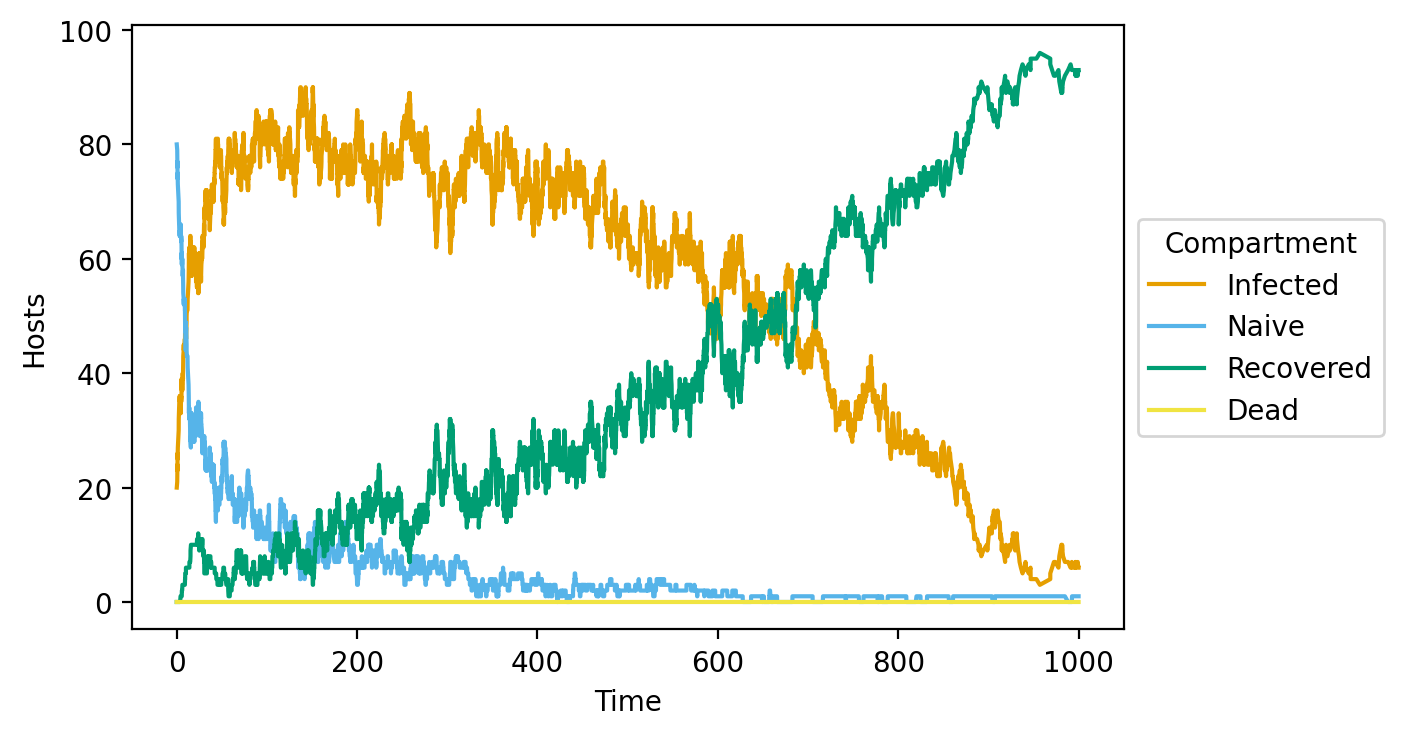

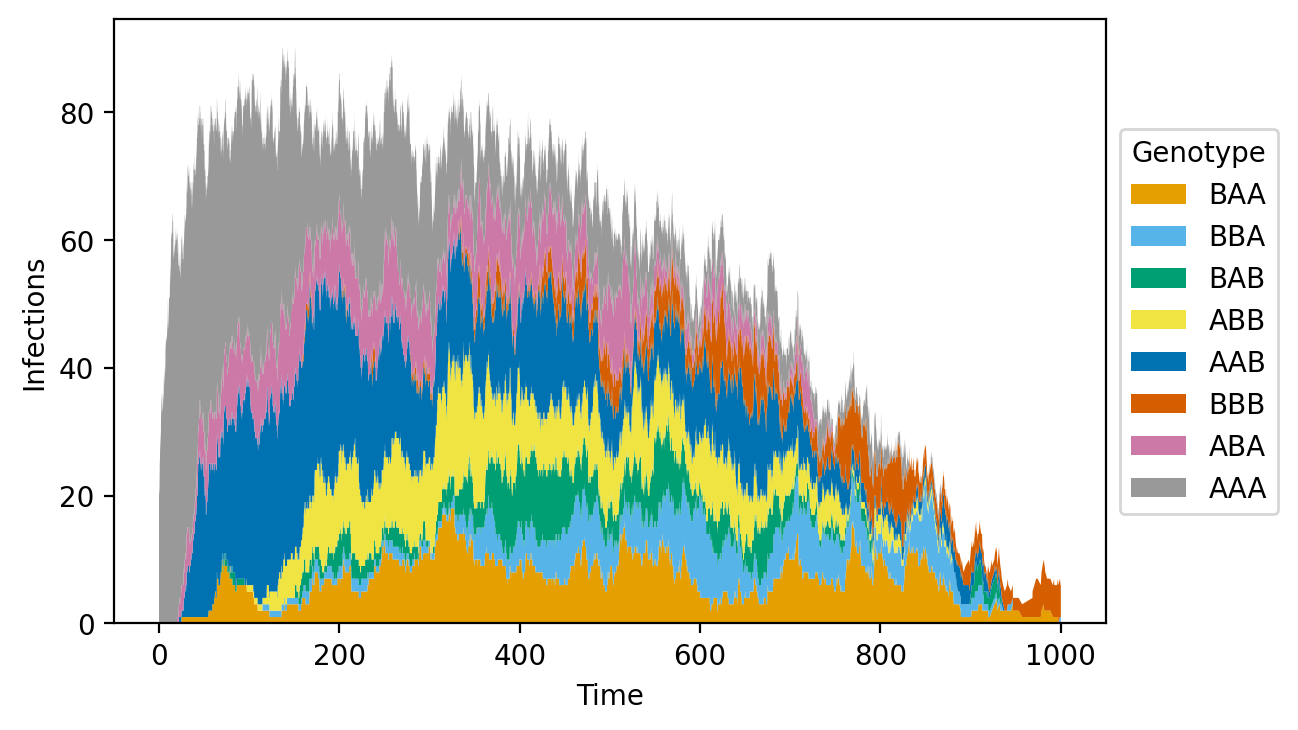

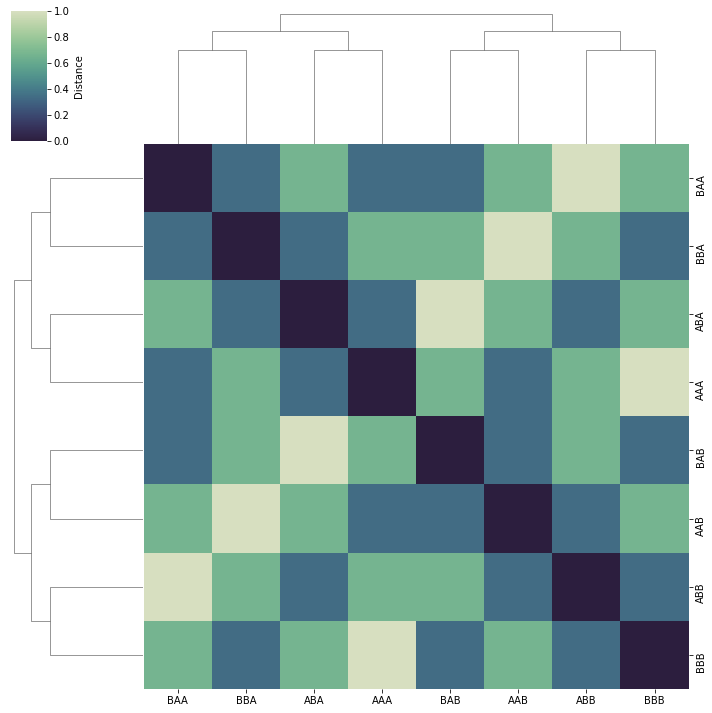

In [7]:
# Plot all genomes separately:
graph_compartments = model.compartmentPlot(
    'tests/immunity_loss/chronic_infection_example_compartments.png', data
    )

graph_composition = model.compositionPlot(
    'tests/immunity_loss/chronic_infection_example_composition_ind.png', data,
    num_top_sequences=6,
    count_individuals_based_on_model=model
    )

graph_clustermap = model.clustermap(
    'tests/immunity_loss/chronic_infection_example_clustermap.png', data,
    save_data_to_file='chronic_infection_example_pairwise_distances.csv',
    num_top_sequences=15,
    )